In [2]:
import numpy as np
import pandas as pd


In [3]:
S= -1*(3/5*np.log2(3/5)+(2/5*np.log2(2/5)))
S

0.9709505944546686

In [4]:
Y4=-1*(1/3*np.log2(1/3)+(2/3*np.log2(2/3)))
Y4

0.9182958340544896

In [5]:
N4 = 0

In [6]:
IG = S - (3/5 * Y4 + 2/5*N4)
IG

0.4199730940219749

In [7]:
#Peso

In [8]:
train = pd.read_csv("data/train.csv",index_col="PassengerId")

In [9]:
train.head()
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Age"].isna().sum()

0

In [10]:
train["Embarked"] = train["Embarked"].fillna("S")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
embarked = pd.get_dummies(train["Embarked"])
train = pd.concat([train,embarked],axis=1)
train = train.drop(columns=["Embarked"])
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,0,0,1


In [12]:
train["Sex"]=train["Sex"].map({"male":0,"female":1})
train = train.drop(columns=["Cabin"])
train=train.drop(columns=["Name","Ticket"])
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0,1
2,1,1,1,38.0,1,0,71.2833,1,0,0
3,1,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,0,35.0,0,0,8.0500,0,0,1


In [13]:
# import plotly.express as px
# px.histogram(train,x="Age",y="Survived",color="Sex")

In [14]:
# px.histogram(train,x="Pclass",y="Survived",color="Sex")

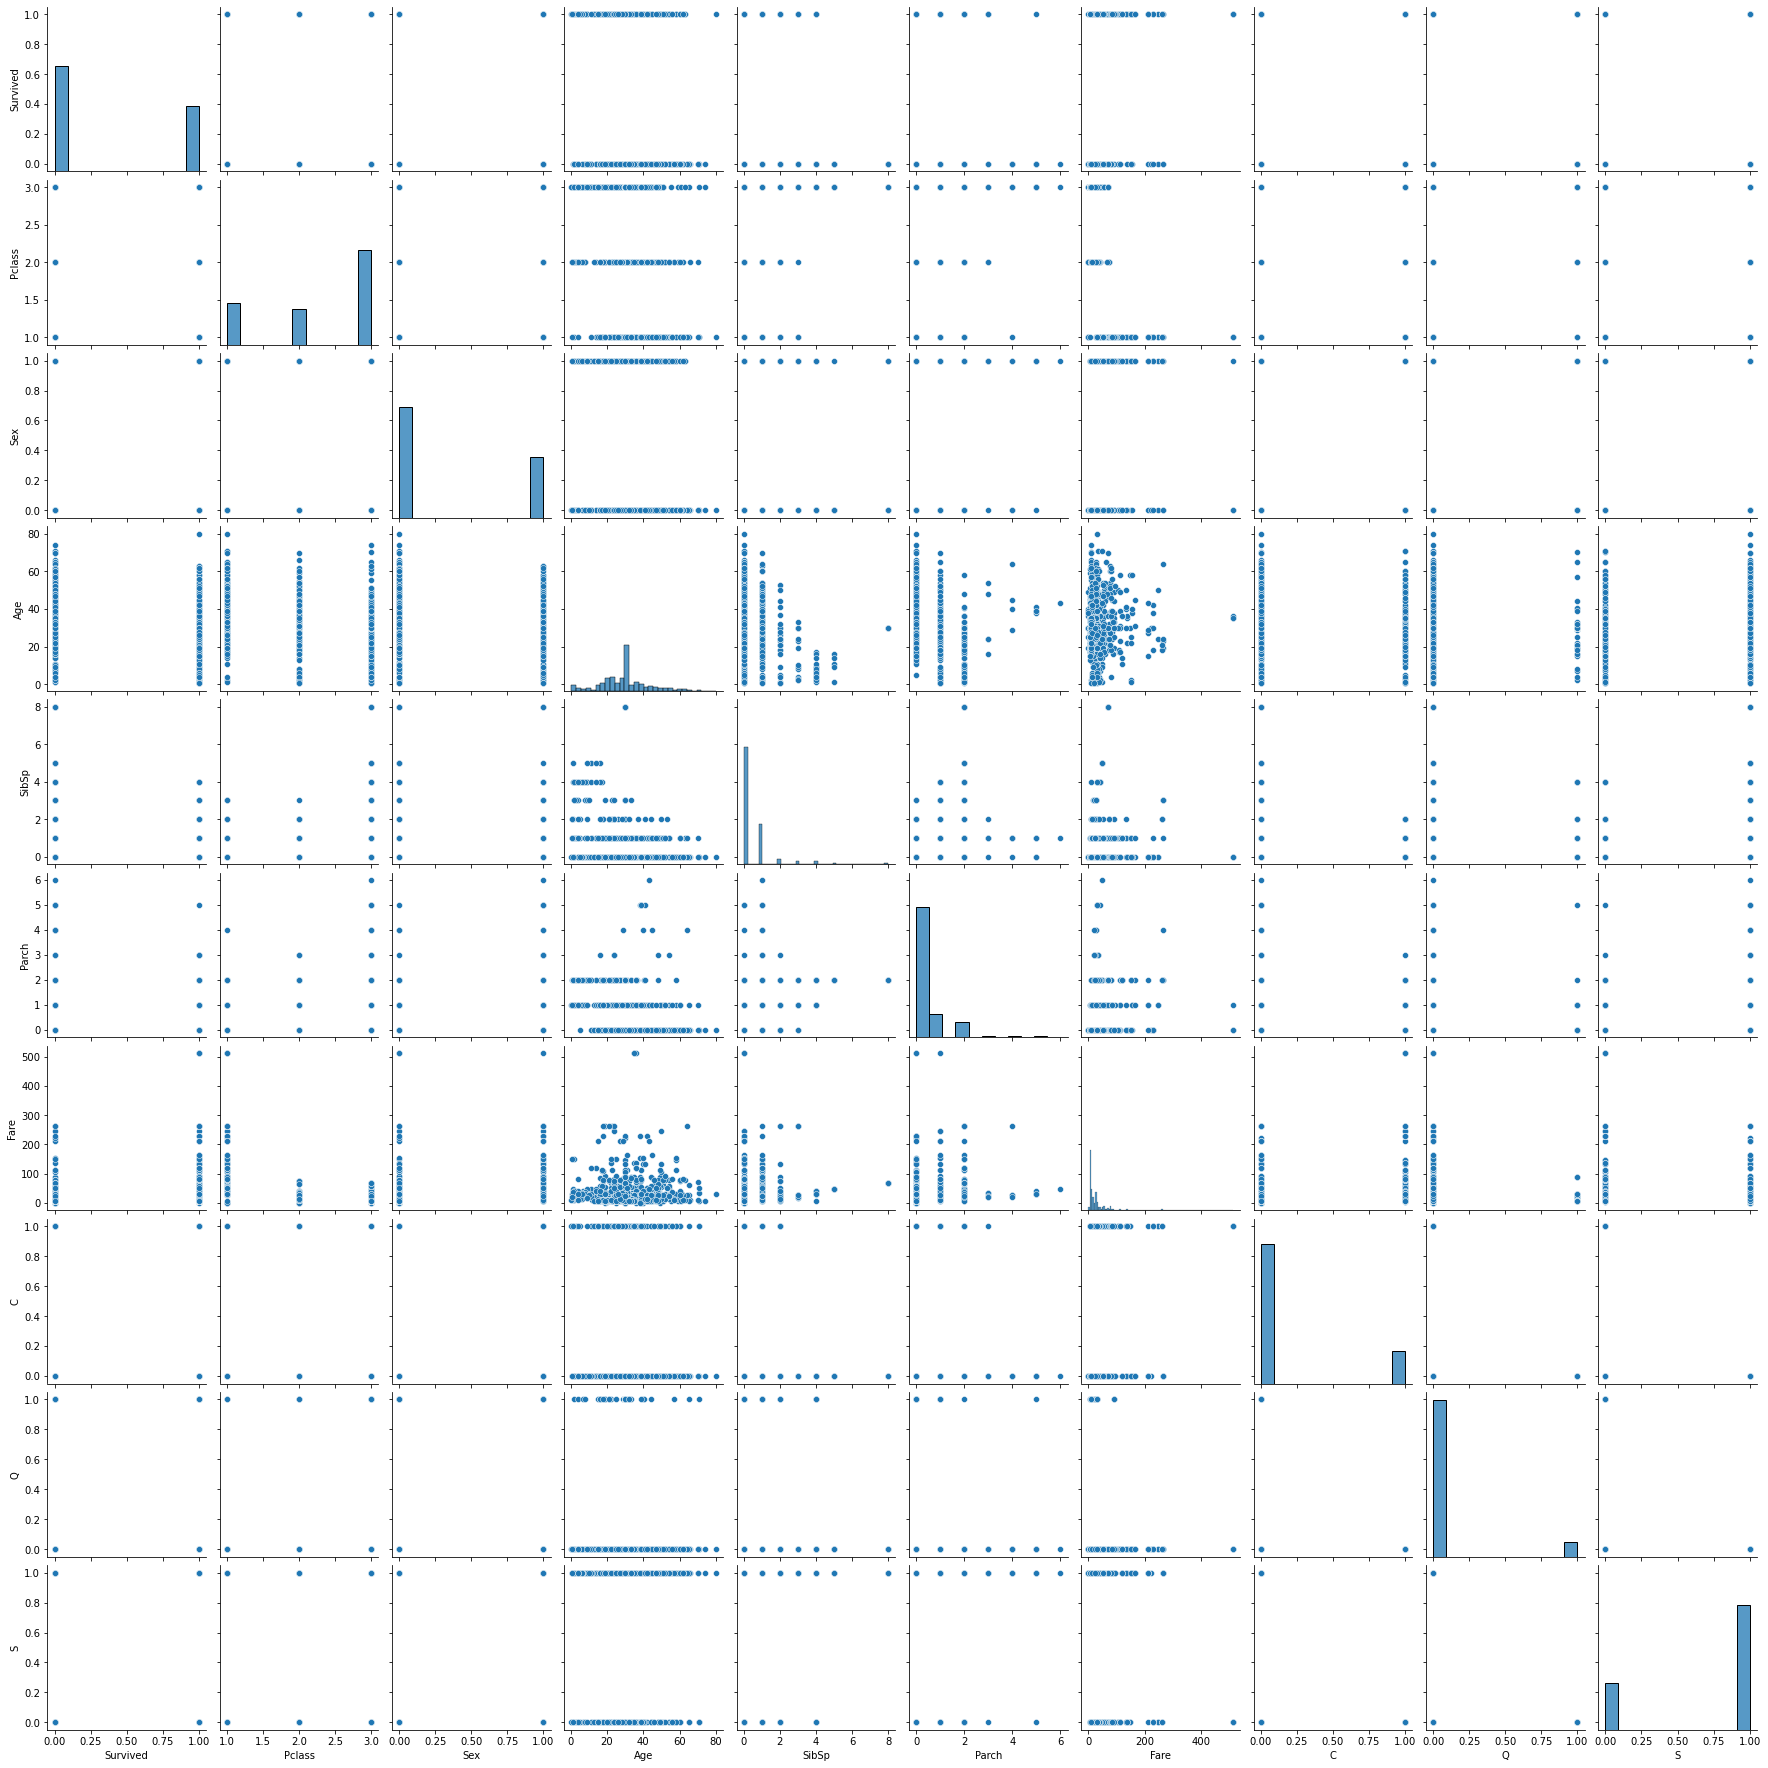

In [15]:
import seaborn as sns
sns.pairplot(train)

In [16]:
test = pd.read_csv("data/test.csv",index_col="PassengerId")
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [17]:
test["Age"] = test["Age"].fillna(train["Age"].mean())
test["Fare"]= test["Fare"].fillna(train["Fare"].mean())
test["Sex"] = test["Sex"].map({"male":0,"female":1})
embark = pd.get_dummies(test["Embarked"])
test=pd.concat([test,embark],axis=1)
test = test.drop(columns=["Cabin","Name","Ticket","Embarked"])


In [18]:

test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
 8   S       418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Far

In [19]:
y_true = pd.read_csv("data/ground_truth.csv",index_col="PassengerId")
y_true.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [20]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [21]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S']]
y_train = train[['Survived']]

In [22]:
X_test = test 
y_test = y_true

In [23]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)
dt.score(X_test,y_test)

0.9545454545454546

In [24]:
dt.feature_importances_

array([0.20260669, 0.59672151, 0.07296512, 0.04262917, 0.01266578,
       0.07241174, 0.        , 0.        , 0.        ])

In [25]:
most_important = dt.feature_importances_.argsort()[-2:]
most_important

array([0, 1], dtype=int64)

In [26]:
X_train.columns[most_important].values

array(['Pclass', 'Sex'], dtype=object)

In [27]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\NGALAZ\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NGALAZ\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = log_reg.predict_proba(X_test)[:,1]

In [29]:
from sklearn.metrics import (r2_score,f1_score,roc_auc_score,roc_curve,mean_squared_error,precision_score,recall_score,accuracy_score,make_scorer)

In [30]:

fpr,tpr,thr = roc_curve(y_test,y_pred)



In [31]:
auc = roc_auc_score(y_test,y_pred)
auc

0.9812277404036407

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.values.ravel())
y_pred_knn = knn.predict(X_test)
acc=accuracy_score(y_true= y_test,y_pred=y_pred_knn)

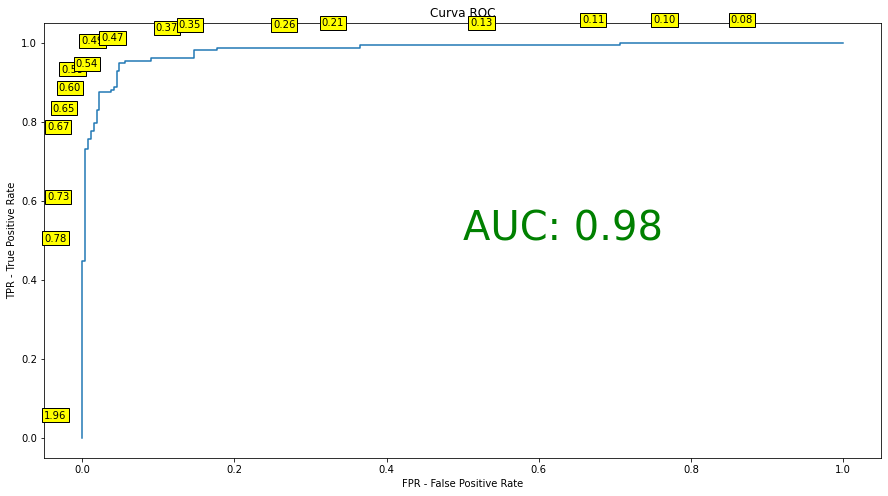

In [33]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=(15,8))
ax.plot(fpr,tpr)
ax.set_title("Curva ROC")
ax.set_xlabel("FPR - False Positive Rate")
ax.set_ylabel("TPR - True Positive Rate")

ax.text(.5,.5, f"AUC: {auc:0.2f}",c="green",fontdict={"size":40})

for i,(f,t,x) in enumerate(zip(fpr,tpr,thr)):
     if i%4 == 0:
        ax.text(f-.05,t+.05,f"{x:0.2f}",bbox={"facecolor":"yellow","pad":2})

